# Solve the 2D linear lee wave problem using LeeWaveSolver

In [1]:
from solver import LeeWaveSolver
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import cmocean
import numpy as np
%load_ext autoreload
%autoreload 2

### First, we initialise the solver and set the flow conditions and topography:

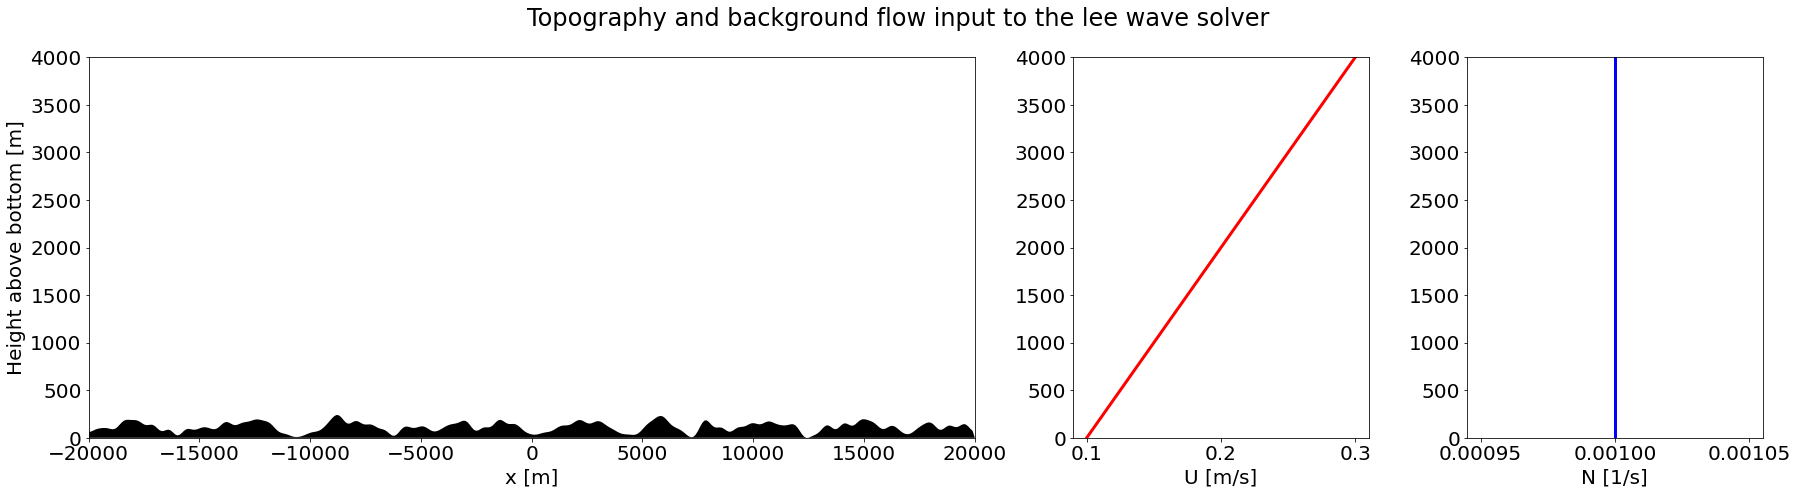

In [2]:
# Initialise the solver with some grid dimensions:
solver = LeeWaveSolver(nx=400, nz=201, nm =200, H=4000, L=20000)

# Next, set the topography:
solver.set_topo(topo_type='GJ98')

# Set the background velocity profile:
solver.set_mean_velocity(U_type='Linear', U_0=0.1, U_H=0.3)

# Set the background stratification profile:
solver.set_mean_stratification(N_type='Uniform', N_0=0.001, N_H=0.003)

# Visualize the inputs:
solver.plot_inputs()

### Now solve for the lee wave fields (this might take a minute or two):

In [3]:
# Solve the lee wave problem:
solver.solve(f=1e-4, open_boundary=False, hydrostatic=False, Ah=0.1)

In [4]:
# Take a look at the output wave fields
solver.wave_fields

<xarray.Dataset>
Dimensions:     (k: 400, x: 400, z: 201)
Coordinates:
  * x           (x) float64 -2e+04 -1.99e+04 -1.98e+04 ... 1.98e+04 1.99e+04
  * k           (k) float64 -0.03142 -0.03126 -0.0311 ... 0.03094 0.0311 0.03126
  * z           (z) float64 0.0 20.0 40.0 60.0 ... 3.96e+03 3.98e+03 4e+03
Data variables: (12/17)
    psi         (x, z) float64 -5.131 -2.783 -0.9274 ... -3.372 -1.688 1.643e-13
    u           (x, z) float64 -0.118 -0.1056 -0.07218 ... -0.08472 -0.08484
    v           (x, z) float64 0.008852 0.01525 0.02778 ... 0.006786 0.006799
    w           (x, z) float64 -0.003769 0.003499 ... -0.003303 5.727e-16
    b           (x, z) float64 4.53e-05 2.232e-05 ... 5.454e-06 -1.951e-07
    p           (x, z) float64 -0.002192 0.3386 0.5205 ... 24.75 24.89 24.93
    ...          ...
    u_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    v_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    w_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    b_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    p_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    h_topo_hat  (k) complex128 0j ... (-1.20742941928644e-11-1.51250816033888...
Attributes:
    description:  Lee wave solver output fields

In [5]:
# Take a look at the diagnostics
solver.diags

<xarray.Dataset>
Dimensions:         (x: 400, z: 201)
Coordinates:
  * x               (x) float64 -2e+04 -1.99e+04 -1.98e+04 ... 1.98e+04 1.99e+04
  * z               (z) float64 0.0 20.0 40.0 60.0 ... 3.96e+03 3.98e+03 4e+03
Data variables: (12/17)
    E_flux_1D       (z) float64 0.04025 0.04002 0.03968 ... 7.675e-05 1.658e-16
    E_kinetic_1D    (z) float64 45.78 40.68 30.99 21.97 ... 4.202 4.213 4.216
    E_potential_1D  (z) float64 1.291 2.625 5.548 ... 0.0703 0.01701 2.019e-05
    E_1D            (z) float64 47.08 43.3 36.54 31.11 ... 4.272 4.23 4.216
    diss_rate_1D    (z) float64 3.359e-08 3.146e-08 ... 3.629e-09 3.627e-09
    mixing_1D       (z) float64 1.678e-09 2.755e-09 ... 1.511e-11 8.166e-15
    ...              ...
    E_kinetic_2D    (x, z) float64 7.195 5.853 3.129 1.24 ... 3.693 3.715 3.72
    E_potential_2D  (x, z) float64 1.054 0.2559 0.01615 ... 0.01528 1.954e-05
    E_2D            (x, z) float64 8.249 6.109 3.145 1.243 ... 3.756 3.73 3.72
    diss_rate_2D    (x, z) float64 1.647e-08 1.564e-08 ... 3.021e-09 3.019e-09
    mixing_2D       (x, z) float64 4.284e-11 8.544e-10 ... 1.329e-11 8.445e-16
    D_2D            (x, z) float64 1.652e-08 1.65e-08 ... 3.034e-09 3.019e-09
Attributes:
    description:  Lee wave solver diagnostics

### Make some plots with the inbuilt plotting function:

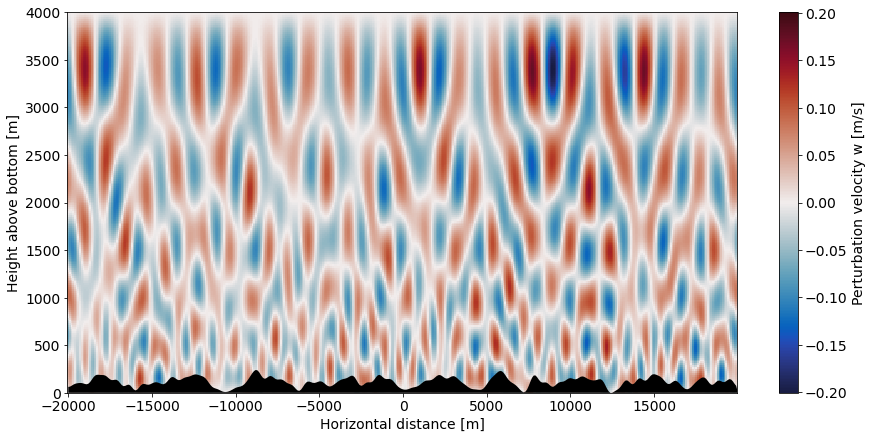

In [6]:
solver.plot(solver.wave_fields.w)

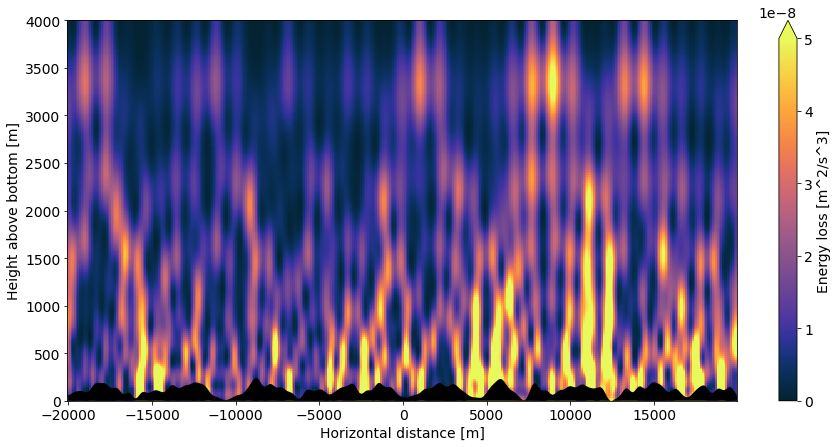

In [7]:
solver.plot(solver.diags.D_2D, vmin = 0, vmax =5e-8)

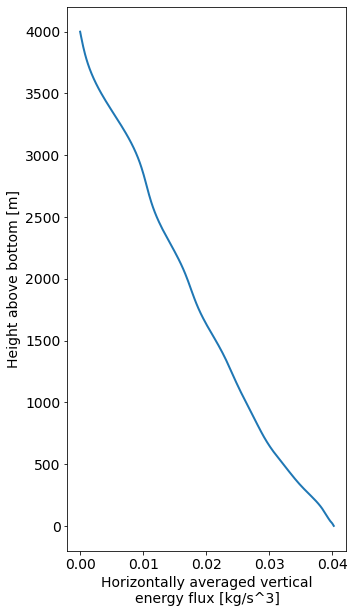

In [12]:
solver.plot(solver.diags.E_flux_1D)